# Lab 2 Part 2

### Part a) Data Wrangling:



#### Importing Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing #For normalizing
from sklearn.model_selection import train_test_split # For training testing data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Dataset:

In [3]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#### 2. Missing Data:

In [4]:
data.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


####  3. Categorize:


In [5]:
def categorize(row):
    if(row['Sales'] >= 15):
        return "high"
    elif(row['Sales'] < 15 and row['Sales'] >= 5):
        return "medium"
    else:
        return "low"

data.apply(lambda row: categorize(row), axis=1)


0        high
1      medium
2      medium
3        high
4      medium
        ...  
195    medium
196    medium
197    medium
198      high
199    medium
Length: 200, dtype: object

####  4. Concatenation

In [6]:
data['Sales Type'] = data.apply(lambda row: categorize(row), axis=1)
data

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales Type
0,1,230.1,37.8,69.2,22.1,high
1,2,44.5,39.3,45.1,10.4,medium
2,3,17.2,45.9,69.3,9.3,medium
3,4,151.5,41.3,58.5,18.5,high
4,5,180.8,10.8,58.4,12.9,medium
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,medium
196,197,94.2,4.9,8.1,9.7,medium
197,198,177.0,9.3,6.4,12.8,medium
198,199,283.6,42.0,66.2,25.5,high


#### 5. Groupby and Aggregation:

In [7]:
data_group = data.groupby('Sales Type')
data_group.first()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Sales Type,,,,,
high,1,230.1,37.8,69.2,22.1
low,9,8.6,2.1,1.0,4.8
medium,2,44.5,39.3,45.1,10.4


In [8]:
print("TV sum = ",data['TV'].sum())
print("TV mean = ",data['TV'].sum())
print("Newspaper sum = ",data['Newspaper'].sum())
print("Newspaper mean = ",data['Newspaper'].sum())
print("Radio sum = ",data['Radio'].sum())
print("Radio mean = ",data['Radio'].sum())

TV sum =  29408.5
TV mean =  29408.5
Newspaper sum =  6110.799999999999
Newspaper mean =  6110.799999999999
Radio sum =  4652.800000000001
Radio mean =  4652.800000000001


#### 6. Reshaping and Pivoting:

In [9]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,Sales Type
0,1,230.1,37.8,69.2,22.1,high
1,2,44.5,39.3,45.1,10.4,medium
2,3,17.2,45.9,69.3,9.3,medium
3,4,151.5,41.3,58.5,18.5,high
4,5,180.8,10.8,58.4,12.9,medium


In [10]:
df_stacked = data.stack() 
print(df_stacked.head(26))

0  Unnamed: 0         1
   TV             230.1
   Radio           37.8
   Newspaper       69.2
   Sales           22.1
   Sales Type      high
1  Unnamed: 0         2
   TV              44.5
   Radio           39.3
   Newspaper       45.1
   Sales           10.4
   Sales Type    medium
2  Unnamed: 0         3
   TV              17.2
   Radio           45.9
   Newspaper       69.3
   Sales            9.3
   Sales Type    medium
3  Unnamed: 0         4
   TV             151.5
   Radio           41.3
   Newspaper       58.5
   Sales           18.5
   Sales Type      high
4  Unnamed: 0         5
   TV             180.8
dtype: object


In [11]:
df_unstacked = df_stacked.unstack() 
print(df_unstacked.head(10)) 

  Unnamed: 0     TV Radio Newspaper Sales Sales Type
0          1  230.1  37.8      69.2  22.1       high
1          2   44.5  39.3      45.1  10.4     medium
2          3   17.2  45.9      69.3   9.3     medium
3          4  151.5  41.3      58.5  18.5       high
4          5  180.8  10.8      58.4  12.9     medium
5          6    8.7  48.9        75   7.2     medium
6          7   57.5  32.8      23.5  11.8     medium
7          8  120.2  19.6      11.6  13.2     medium
8          9    8.6   2.1         1   4.8        low
9         10  199.8   2.6      21.2  10.6     medium


### Part b) Data Modeling:
 

#### 7. Dataset:

In [12]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [13]:
#Selecting every 6th row from column "TV"
data.loc[data.index % 6 == 0,'TV']

0      230.1
6       57.5
12      23.8
18      69.2
24      62.3
30     292.9
36     266.9
42     293.6
48     227.2
54     262.7
60      53.5
66      31.5
72      26.8
78       5.4
84     213.5
90     134.3
96     197.6
102    280.2
108     13.1
114     78.2
120    141.3
126      7.8
132      8.4
138     43.0
144     96.2
150    280.7
156     93.9
162    188.4
168    215.4
174    222.4
180    156.6
186    139.5
192     17.2
198    283.6
Name: TV, dtype: float64

In [14]:
#Replacing every 6th row of column TV with NaN Values
data.loc[data.index % 6 == 0,'TV'] = np.nan
data.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,NaN,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,NaN,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [15]:
# Similarly selecting 10th row of coloumn Newspaper and replacing with NaN value
data.loc[data.index % 10 == 0,'Newspaper'] = np.nan
data.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,NaN,37.8,NaN,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,NaN,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [16]:
# Printing only rows containing no Nan/NULL value.
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
data.loc[row_has_NaN == False].head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6
11,12,214.7,24.0,4.0,17.4
13,14,97.5,7.6,7.2,9.7


#### 8. Fill in missing values:

In [17]:
# Fill missing(NaN/NULL) values with 0
data_0 = data.replace(np.nan,0)
data_0.head(25)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,0.0,37.8,0.0,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,0.0,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [18]:
# Fill missing(NaN/NULL) values with average of column
X = data.iloc[:, :].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])
data = pd.DataFrame(data=X, index=list(range(X.shape[0])), columns=['Unnamed: 0','TV','Radio','Newspaper','Sales'])
data.head(25)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1.0,148.757831,37.8,30.492222,22.1
1,2.0,44.500000,39.3,45.100000,10.4
2,3.0,17.200000,45.9,69.300000,9.3
3,4.0,151.500000,41.3,58.500000,18.5
4,5.0,180.800000,10.8,58.400000,12.9
5,6.0,8.700000,48.9,75.000000,7.2
6,7.0,148.757831,32.8,23.500000,11.8
7,8.0,120.200000,19.6,11.600000,13.2
8,9.0,8.600000,2.1,1.000000,4.8
9,10.0,199.800000,2.6,21.200000,10.6


#### 9. Normalization: 

In [19]:
x = data.loc[:,data.columns != 'Sales'].values #normalizing is not done in target variable
y = data.iloc[:,4] # target variable to be added later in the dataframe
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, index=list(range(x.shape[0])), columns=['Unnamed: 0','TV','Radio','Newspaper'])
data.insert(4, "Sales", y, True)
data.head(25)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0.000000,0.500703,0.762097,0.265543,22.1
1,0.005025,0.148123,0.792339,0.394019,10.4
2,0.010050,0.055800,0.925403,0.606860,9.3
3,0.015075,0.509976,0.832661,0.511873,18.5
4,0.020101,0.609063,0.217742,0.510994,12.9
5,0.025126,0.027054,0.985887,0.656992,7.2
6,0.030151,0.500703,0.661290,0.204046,11.8
7,0.035176,0.404126,0.395161,0.099384,13.2
8,0.040201,0.026716,0.042339,0.006157,4.8
9,0.045226,0.673318,0.052419,0.183817,10.6


#### 10. Data Splitting:

In [20]:
x = data[['TV','Radio','Newspaper']] #Features
y = data['Sales'].values # Target Variable
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.60, random_state=42)

#### 11. Linear Regression Training:

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = model.predict(x_test)

In [23]:
#Predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,16.9,16.661176
1,22.4,21.533670
2,21.4,15.216996
3,7.3,10.901878
4,24.7,22.746648
...,...,...
75,15.9,16.257140
76,15.0,15.096390
77,20.7,20.056379
78,11.7,13.448137


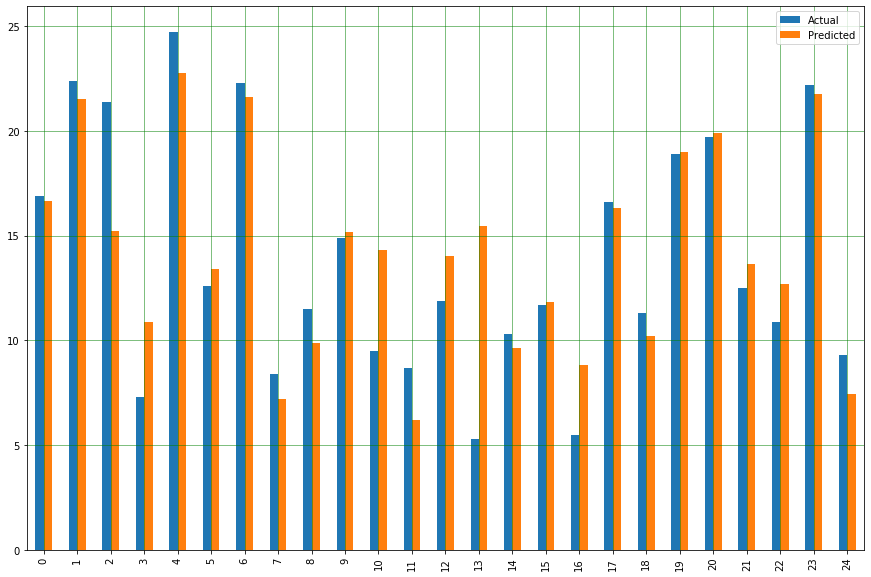

In [24]:
# Plot for True value vs Predicted value
df1 = df.head(25)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### 12. Testing error:

In [25]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 9.250575159224704


#### 13. Playing with the Model: 

In [26]:
#Reducing the number of features
x = data[['TV']] #Features
y = data['Sales'].values # Target Variable
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.60, random_state=42)

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = model.predict(x_test)

In [29]:
#Predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,16.9,14.961759
1,22.4,16.473319
2,21.4,14.276982
3,7.3,7.823051
4,24.7,17.645838
...,...,...
75,15.9,17.141985
76,15.0,14.001141
77,20.7,15.978884
78,11.7,17.744725


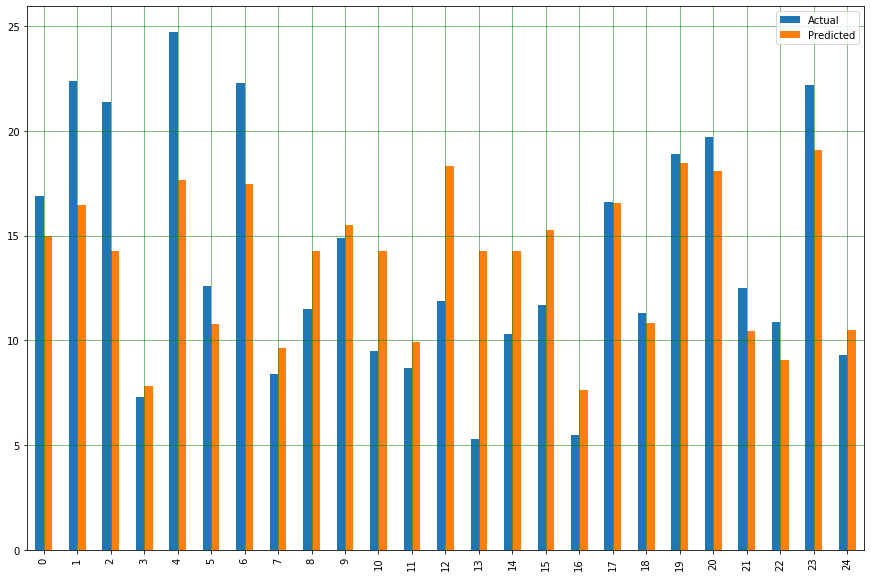

In [30]:
# Plot for True value vs Predicted value
df1 = df.head(25)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##### Here Mean Squared Error Increases on Reducing the features which indicates that the feature 'TV' has less dependency on the target variable 'Sales'

In [31]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 13.883707566712577
